The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  histogram for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Text(0.5, 1.0, 'Median value of owner-occupied homes boxplot')

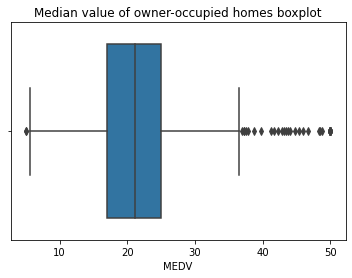

In [4]:
sns.boxplot(data = boston_df, x = 'MEDV').set_title('Median value of owner-occupied homes boxplot')                

Text(0.5, 1.0, 'Charles River Variable Histogram')

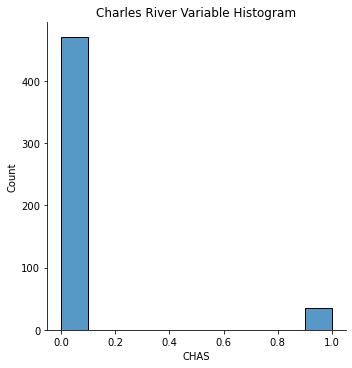

In [21]:
sns.displot(data = boston_df, x = 'CHAS')
plt.title('Charles River Variable Histogram')

Text(0.5, 1.0, 'MEDV variable vs the AGE variable Boxplot')

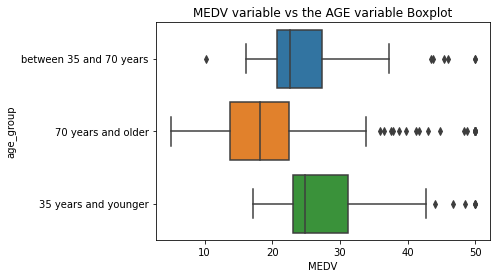

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
sns.boxplot(data = boston_df, x = 'MEDV', y = 'age_group').set_title('MEDV variable vs the AGE variable Boxplot')

Text(0.5, 1.0, 'Nitric Oxide vs Non-retail Business acres')

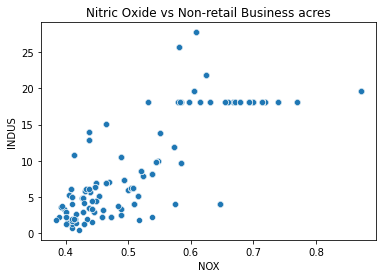

In [7]:
sns.scatterplot(data = boston_df, x = 'NOX', y = 'INDUS').set_title('Nitric Oxide vs Non-retail Business acres')

Just by looking at the scatterplot there seems to be a somewhat positive correlation between the two variables. The linar correlation becomes almost horizontal as the INDUS variable approaches around 17.

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

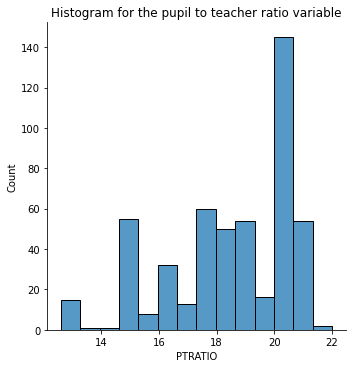

In [20]:
sns.displot(data = boston_df, x = 'PTRATIO')
plt.title('Histogram for the pupil to teacher ratio variable')

Null Hypothesis: There is no correlation between median value of houses and the fact that they are bounded by the Charles River

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [10]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'], boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center = 'mean')
#p-value is less than 0.05, variances are not equal

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                 boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

p-value is less than 0.05 which means to reject the null hypothesis and there is a statistical significance

Null Hypothesis: There is no difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [12]:
scipy.stats.levene(
boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
    center = 'mean')
#p-value is greater than 0.05, variances are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [13]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV'] 

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower,thirtyfive_seventy,seventy_older)
f_statistic, p_value

(36.40764999196599, 1.7105011022702984e-15)

Because the p-value is lower than 0.05, we reject the null hypothesis and there is a difference in the median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [15]:
boston_df['NOX'].corr(boston_df['INDUS'])

0.763651446920915

The pearson correlation shows that there is strong correlation between the two values

Null Hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [19]:
X = boston_df['MEDV']
y = boston_df['DIS']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        23:04:00   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is less than 0.05 so the null hypothesis is rejected and there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes